In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
from datetime import datetime as dt
from copy import deepcopy
import torch
print(torch.__version__)
print(torch.cuda.is_available())

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f

import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import transforms

from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from attacks import fgsm, pgd
from utils import clean_acc, adv_acc, print_table
from trainer import Trainer, plot_history
from model import Small
from layers import *

1.7.0
True


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

seed = torch.seed()
print(f"seed: {seed}")
torch.manual_seed(seed)

cuda
seed: 16266253595209834611


In [4]:
tr_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
vl_transform = transforms.Compose([
    transforms.ToTensor()
])

ds_train = MNIST('../data', train=True, download=True, transform=tr_transform)
ds_test = MNIST('../data', train=False, download=True, transform=vl_transform)

batch_size = (100, 400)
train_dl = DataLoader(ds_train, batch_size=batch_size[0], shuffle=True)
test_dl = DataLoader(ds_test, batch_size=batch_size[1], shuffle=True)

iter_on_batch = len(train_dl)
print(f"iter_on_batch: {iter_on_batch}")

iter_on_batch: 600


## eps 0.014 co 50 epok
## kappa schodzi do 1/2 w 100 epokach

In [ ]:
from hyperparam_scheduler import LinearScheduler

kappa_scheduler = LinearScheduler(start=1, end=0.5)
kappa_scheduler.calc_coefficient(-0.5, 100, iter_on_batch)

eps_scheduler = LinearScheduler(start=0)
eps_scheduler.calc_coefficient(0.014, 50, iter_on_batch)

cuda
epoch start with: eps: 0.00000000, kappa: 1.00000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:02
Epoch: 1 Validation Loss: 0.1672 accuracy: 0.9473, robust err: 0.2854

epoch start with: eps: 0.00028000, kappa: 0.99500000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 2 Validation Loss: 0.1159 accuracy: 0.9664, robust err: 0.3288

epoch start with: eps: 0.00056000, kappa: 0.99000000
function: _train_test_epoch took: 0:01:14
function: _train_test_epoch took: 0:00:01
Epoch: 3 Validation Loss: 0.0896 accuracy: 0.9737, robust err: 0.3027

epoch start with: eps: 0.00084000, kappa: 0.98500000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 4 Validation Loss: 0.0867 accuracy: 0.9772, robust err: 0.2946

epoch start with: eps: 0.00112000, kappa: 0.98000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 5 Validation Loss: 

function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 40 Validation Loss: 0.2015 accuracy: 0.9818, robust err: 0.1866

epoch start with: eps: 0.01120000, kappa: 0.80000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 41 Validation Loss: 0.2058 accuracy: 0.9818, robust err: 0.1856

epoch start with: eps: 0.01148000, kappa: 0.79500000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 42 Validation Loss: 0.2108 accuracy: 0.9813, robust err: 0.1884

epoch start with: eps: 0.01176000, kappa: 0.79000000
function: _train_test_epoch took: 0:00:53
function: _train_test_epoch took: 0:00:01
Epoch: 43 Validation Loss: 0.2155 accuracy: 0.9811, robust err: 0.1882

epoch start with: eps: 0.01204000, kappa: 0.78500000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 44 Validation Loss: 0.2180 accuracy: 0.9807, robust err: 0.1874

epoch st

function: _train_test_epoch took: 0:00:01
Epoch: 79 Validation Loss: 0.3474 accuracy: 0.9737, robust err: 0.1946

epoch start with: eps: 0.02212000, kappa: 0.60500000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 80 Validation Loss: 0.3499 accuracy: 0.9737, robust err: 0.1935

epoch start with: eps: 0.02240000, kappa: 0.60000000
function: _train_test_epoch took: 0:00:53
function: _train_test_epoch took: 0:00:01
Epoch: 81 Validation Loss: 0.3524 accuracy: 0.9734, robust err: 0.1939

epoch start with: eps: 0.02268000, kappa: 0.59500000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 82 Validation Loss: 0.3584 accuracy: 0.9729, robust err: 0.1944

epoch start with: eps: 0.02296000, kappa: 0.59000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 83 Validation Loss: 0.3625 accuracy: 0.9722, robust err: 0.1944

epoch start with: eps: 0.02324000, kappa: 0.585000

function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 121 Validation Loss: 0.4288 accuracy: 0.9678, robust err: 0.1890

epoch start with: eps: 0.03388000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 122 Validation Loss: 0.4255 accuracy: 0.9684, robust err: 0.1871

epoch start with: eps: 0.03416000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:53
function: _train_test_epoch took: 0:00:02
Epoch: 123 Validation Loss: 0.4261 accuracy: 0.9681, robust err: 0.1878

epoch start with: eps: 0.03444000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 124 Validation Loss: 0.4331 accuracy: 0.9672, robust err: 0.1928

epoch start with: eps: 0.03472000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 125 Validation Loss: 0.4273 accuracy: 0.9679, robust err: 0.1879

epo

function: _train_test_epoch took: 0:00:02
Epoch: 160 Validation Loss: 0.4480 accuracy: 0.9675, robust err: 0.1948

epoch start with: eps: 0.04480000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 161 Validation Loss: 0.4479 accuracy: 0.9663, robust err: 0.1904

epoch start with: eps: 0.04508000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 162 Validation Loss: 0.4476 accuracy: 0.9661, robust err: 0.1924

epoch start with: eps: 0.04536000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 163 Validation Loss: 0.4577 accuracy: 0.9658, robust err: 0.1988

epoch start with: eps: 0.04564000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 164 Validation Loss: 0.4484 accuracy: 0.9653, robust err: 0.1929

epoch start with: eps: 0.04592000, kappa: 0.5

function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 200 Validation Loss: 0.4626 accuracy: 0.9663, robust err: 0.1974

epoch start with: eps: 0.05600000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 201 Validation Loss: 0.4759 accuracy: 0.9658, robust err: 0.2028

epoch start with: eps: 0.05628000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 202 Validation Loss: 0.4654 accuracy: 0.9658, robust err: 0.1954

epoch start with: eps: 0.05656000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 203 Validation Loss: 0.4743 accuracy: 0.9662, robust err: 0.1992

epoch start with: eps: 0.05684000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 204 Validation Loss: 0.4613 accuracy: 0.9658, robust err: 0.1967

epo

function: _train_test_epoch took: 0:00:02
Epoch: 239 Validation Loss: 0.4550 accuracy: 0.9637, robust err: 0.2049

epoch start with: eps: 0.06692000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 240 Validation Loss: 0.4438 accuracy: 0.9657, robust err: 0.2032

epoch start with: eps: 0.06720000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:20
function: _train_test_epoch took: 0:00:01
Epoch: 241 Validation Loss: 0.4659 accuracy: 0.9635, robust err: 0.2126

epoch start with: eps: 0.06748000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 242 Validation Loss: 0.4482 accuracy: 0.9641, robust err: 0.2007

epoch start with: eps: 0.06776000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 243 Validation Loss: 0.4392 accuracy: 0.9659, robust err: 0.1969

epoch start with: eps: 0.06804000, kappa: 0.5

function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 279 Validation Loss: 0.4671 accuracy: 0.9631, robust err: 0.2083

epoch start with: eps: 0.07812000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 280 Validation Loss: 0.4669 accuracy: 0.9643, robust err: 0.2097

epoch start with: eps: 0.07840000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 281 Validation Loss: 0.4621 accuracy: 0.9637, robust err: 0.2041

epoch start with: eps: 0.07868000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:52
function: _train_test_epoch took: 0:00:02
Epoch: 282 Validation Loss: 0.4825 accuracy: 0.9605, robust err: 0.2167

epoch start with: eps: 0.07896000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 283 Validation Loss: 0.4716 accuracy: 0.9644, robust err: 0.2108

epo

function: _train_test_epoch took: 0:00:04
Epoch: 318 Validation Loss: 0.4880 accuracy: 0.9617, robust err: 0.2208

epoch start with: eps: 0.08904000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:15
function: _train_test_epoch took: 0:00:01
Epoch: 319 Validation Loss: 0.4779 accuracy: 0.9640, robust err: 0.2098

epoch start with: eps: 0.08932000, kappa: 0.50000000
function: _train_test_epoch took: 0:02:05
function: _train_test_epoch took: 0:00:03
Epoch: 320 Validation Loss: 0.4859 accuracy: 0.9622, robust err: 0.2211

epoch start with: eps: 0.08960000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:19
function: _train_test_epoch took: 0:00:03
Epoch: 321 Validation Loss: 0.4732 accuracy: 0.9622, robust err: 0.2150

epoch start with: eps: 0.08988000, kappa: 0.50000000
function: _train_test_epoch took: 0:01:44
function: _train_test_epoch took: 0:00:01
Epoch: 322 Validation Loss: 0.4848 accuracy: 0.9623, robust err: 0.2201

epoch start with: eps: 0.09016000, kappa: 0.5

function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 358 Validation Loss: 0.4922 accuracy: 0.9609, robust err: 0.2235

epoch start with: eps: 0.10024000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:52
function: _train_test_epoch took: 0:00:02
Epoch: 359 Validation Loss: 0.4873 accuracy: 0.9611, robust err: 0.2241

epoch start with: eps: 0.10052000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:52
function: _train_test_epoch took: 0:00:02
Epoch: 360 Validation Loss: 0.5025 accuracy: 0.9616, robust err: 0.2258

epoch start with: eps: 0.10080000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 361 Validation Loss: 0.4952 accuracy: 0.9614, robust err: 0.2174

epoch start with: eps: 0.10108000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:53
function: _train_test_epoch took: 0:00:02
Epoch: 362 Validation Loss: 0.4963 accuracy: 0.9605, robust err: 0.2223

epo

function: _train_test_epoch took: 0:00:02
Epoch: 397 Validation Loss: 0.5175 accuracy: 0.9601, robust err: 0.2274

epoch start with: eps: 0.11116000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:40
function: _train_test_epoch took: 0:00:02
Epoch: 398 Validation Loss: 0.5178 accuracy: 0.9583, robust err: 0.2336

epoch start with: eps: 0.11144000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:40
function: _train_test_epoch took: 0:00:01
Epoch: 399 Validation Loss: 0.5037 accuracy: 0.9590, robust err: 0.2222

epoch start with: eps: 0.11172000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:41
function: _train_test_epoch took: 0:00:01
Epoch: 400 Validation Loss: 0.5164 accuracy: 0.9570, robust err: 0.2282

epoch start with: eps: 0.11200000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:41
function: _train_test_epoch took: 0:00:01
Epoch: 401 Validation Loss: 0.5265 accuracy: 0.9587, robust err: 0.2350

epoch start with: eps: 0.11228000, kappa: 0.5

function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:02
Epoch: 437 Validation Loss: 0.5158 accuracy: 0.9594, robust err: 0.2237

epoch start with: eps: 0.12236000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:38
function: _train_test_epoch took: 0:00:02
Epoch: 438 Validation Loss: 0.5515 accuracy: 0.9553, robust err: 0.2395

epoch start with: eps: 0.12264000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:38
function: _train_test_epoch took: 0:00:02
Epoch: 439 Validation Loss: 0.5193 accuracy: 0.9583, robust err: 0.2268

epoch start with: eps: 0.12292000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:01
Epoch: 440 Validation Loss: 0.5459 accuracy: 0.9572, robust err: 0.2316

epoch start with: eps: 0.12320000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:02
Epoch: 441 Validation Loss: 0.5363 accuracy: 0.9575, robust err: 0.2388

epo

function: _train_test_epoch took: 0:00:02
Epoch: 476 Validation Loss: 0.5602 accuracy: 0.9539, robust err: 0.2410

epoch start with: eps: 0.13328000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:38
function: _train_test_epoch took: 0:00:02
Epoch: 477 Validation Loss: 0.5626 accuracy: 0.9567, robust err: 0.2379

epoch start with: eps: 0.13356000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:38
function: _train_test_epoch took: 0:00:02
Epoch: 478 Validation Loss: 0.5501 accuracy: 0.9590, robust err: 0.2268

epoch start with: eps: 0.13384000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:02
Epoch: 479 Validation Loss: 0.5636 accuracy: 0.9564, robust err: 0.2456

epoch start with: eps: 0.13412000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:01
Epoch: 480 Validation Loss: 0.5761 accuracy: 0.9533, robust err: 0.2464

epoch start with: eps: 0.13440000, kappa: 0.5

function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:02
Epoch: 516 Validation Loss: 0.5875 accuracy: 0.9530, robust err: 0.2470

epoch start with: eps: 0.14448000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:02
Epoch: 517 Validation Loss: 0.6114 accuracy: 0.9530, robust err: 0.2548

epoch start with: eps: 0.14476000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:38
function: _train_test_epoch took: 0:00:02
Epoch: 518 Validation Loss: 0.5765 accuracy: 0.9547, robust err: 0.2421

epoch start with: eps: 0.14504000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:02
Epoch: 519 Validation Loss: 0.5659 accuracy: 0.9524, robust err: 0.2414

epoch start with: eps: 0.14532000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:38
function: _train_test_epoch took: 0:00:02
Epoch: 520 Validation Loss: 0.5626 accuracy: 0.9565, robust err: 0.2375

epo

function: _train_test_epoch took: 0:00:01
Epoch: 555 Validation Loss: 0.6092 accuracy: 0.9518, robust err: 0.2486

epoch start with: eps: 0.15540000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:01
Epoch: 556 Validation Loss: 0.5915 accuracy: 0.9526, robust err: 0.2501

epoch start with: eps: 0.15568000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:01
Epoch: 557 Validation Loss: 0.5929 accuracy: 0.9496, robust err: 0.2480

epoch start with: eps: 0.15596000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:40
function: _train_test_epoch took: 0:00:01
Epoch: 558 Validation Loss: 0.5903 accuracy: 0.9528, robust err: 0.2436

epoch start with: eps: 0.15624000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:02
Epoch: 559 Validation Loss: 0.6028 accuracy: 0.9489, robust err: 0.2525

epoch start with: eps: 0.15652000, kappa: 0.5

function: _train_test_epoch took: 0:00:40
function: _train_test_epoch took: 0:00:01
Epoch: 595 Validation Loss: 0.6588 accuracy: 0.9437, robust err: 0.2761

epoch start with: eps: 0.16660000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:01
Epoch: 596 Validation Loss: 0.6261 accuracy: 0.9530, robust err: 0.2509

epoch start with: eps: 0.16688000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:38
function: _train_test_epoch took: 0:00:01
Epoch: 597 Validation Loss: 0.6344 accuracy: 0.9479, robust err: 0.2519

epoch start with: eps: 0.16716000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:35
function: _train_test_epoch took: 0:00:02
Epoch: 598 Validation Loss: 0.6256 accuracy: 0.9531, robust err: 0.2428

epoch start with: eps: 0.16744000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:38
function: _train_test_epoch took: 0:00:01
Epoch: 599 Validation Loss: 0.6200 accuracy: 0.9527, robust err: 0.2481

epo

function: _train_test_epoch took: 0:00:02
Epoch: 634 Validation Loss: 0.6947 accuracy: 0.9426, robust err: 0.2739

epoch start with: eps: 0.17752000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:02
Epoch: 635 Validation Loss: 0.6682 accuracy: 0.9508, robust err: 0.2589

epoch start with: eps: 0.17780000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:02
Epoch: 636 Validation Loss: 0.6428 accuracy: 0.9525, robust err: 0.2563

epoch start with: eps: 0.17808000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:02
Epoch: 637 Validation Loss: 0.6721 accuracy: 0.9412, robust err: 0.2620

epoch start with: eps: 0.17836000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:38
function: _train_test_epoch took: 0:00:02
Epoch: 638 Validation Loss: 0.6803 accuracy: 0.9511, robust err: 0.2640

epoch start with: eps: 0.17864000, kappa: 0.5

function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:02
Epoch: 674 Validation Loss: 0.7014 accuracy: 0.9489, robust err: 0.2608

epoch start with: eps: 0.18872000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:02
Epoch: 675 Validation Loss: 0.7127 accuracy: 0.9412, robust err: 0.2799

epoch start with: eps: 0.18900000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:02
Epoch: 676 Validation Loss: 0.6848 accuracy: 0.9507, robust err: 0.2564

epoch start with: eps: 0.18928000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:38
function: _train_test_epoch took: 0:00:02
Epoch: 677 Validation Loss: 0.7254 accuracy: 0.9484, robust err: 0.2763

epoch start with: eps: 0.18956000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:39
function: _train_test_epoch took: 0:00:01
Epoch: 678 Validation Loss: 0.7037 accuracy: 0.9488, robust err: 0.2770

epo

function: _train_test_epoch took: 0:00:02
Epoch: 713 Validation Loss: 0.7198 accuracy: 0.9420, robust err: 0.2679

epoch start with: eps: 0.19964000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:45
function: _train_test_epoch took: 0:00:01
Epoch: 714 Validation Loss: 0.7545 accuracy: 0.9366, robust err: 0.2768

epoch start with: eps: 0.19992000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 715 Validation Loss: 0.7295 accuracy: 0.9427, robust err: 0.2751

epoch start with: eps: 0.20020000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 716 Validation Loss: 0.7706 accuracy: 0.9414, robust err: 0.2804

epoch start with: eps: 0.20048000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 717 Validation Loss: 0.7411 accuracy: 0.9475, robust err: 0.2686

epoch start with: eps: 0.20076000, kappa: 0.5

function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 753 Validation Loss: 0.7806 accuracy: 0.9446, robust err: 0.2785

epoch start with: eps: 0.21084000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 754 Validation Loss: 0.7710 accuracy: 0.9384, robust err: 0.2817

epoch start with: eps: 0.21112000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 755 Validation Loss: 0.7666 accuracy: 0.9400, robust err: 0.2802

epoch start with: eps: 0.21140000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 756 Validation Loss: 0.7598 accuracy: 0.9469, robust err: 0.2716

epoch start with: eps: 0.21168000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:53
function: _train_test_epoch took: 0:00:02
Epoch: 757 Validation Loss: 0.7870 accuracy: 0.9373, robust err: 0.2848

epo

function: _train_test_epoch took: 0:00:01
Epoch: 792 Validation Loss: 0.7915 accuracy: 0.9434, robust err: 0.2953

epoch start with: eps: 0.22176000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:02
Epoch: 793 Validation Loss: 0.8235 accuracy: 0.9418, robust err: 0.2872

epoch start with: eps: 0.22204000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 794 Validation Loss: 0.8121 accuracy: 0.9447, robust err: 0.2790

epoch start with: eps: 0.22232000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 795 Validation Loss: 0.7829 accuracy: 0.9434, robust err: 0.2761

epoch start with: eps: 0.22260000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 796 Validation Loss: 0.7786 accuracy: 0.9368, robust err: 0.2788

epoch start with: eps: 0.22288000, kappa: 0.5

function: _train_test_epoch took: 0:00:53
function: _train_test_epoch took: 0:00:01
Epoch: 832 Validation Loss: 0.8314 accuracy: 0.9423, robust err: 0.2895

epoch start with: eps: 0.23296000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 833 Validation Loss: 0.8160 accuracy: 0.9431, robust err: 0.2819

epoch start with: eps: 0.23324000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 834 Validation Loss: 0.8443 accuracy: 0.9382, robust err: 0.2935

epoch start with: eps: 0.23352000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 835 Validation Loss: 0.8507 accuracy: 0.9350, robust err: 0.2844

epoch start with: eps: 0.23380000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 836 Validation Loss: 0.8301 accuracy: 0.9342, robust err: 0.2867

epo

function: _train_test_epoch took: 0:00:02
Epoch: 871 Validation Loss: 0.9081 accuracy: 0.8603, robust err: 0.3318

epoch start with: eps: 0.24388000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 872 Validation Loss: 0.8985 accuracy: 0.9386, robust err: 0.2861

epoch start with: eps: 0.24416000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 873 Validation Loss: 0.8432 accuracy: 0.9379, robust err: 0.2956

epoch start with: eps: 0.24444000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 874 Validation Loss: 0.8766 accuracy: 0.9315, robust err: 0.3072

epoch start with: eps: 0.24472000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:52
function: _train_test_epoch took: 0:00:02
Epoch: 875 Validation Loss: 0.8783 accuracy: 0.9296, robust err: 0.3123

epoch start with: eps: 0.24500000, kappa: 0.5

function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:01
Epoch: 911 Validation Loss: 0.8936 accuracy: 0.9310, robust err: 0.2977

epoch start with: eps: 0.25508000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 912 Validation Loss: 0.8836 accuracy: 0.9341, robust err: 0.3067

epoch start with: eps: 0.25536000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 913 Validation Loss: 0.8851 accuracy: 0.9369, robust err: 0.3006

epoch start with: eps: 0.25564000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 914 Validation Loss: 0.8930 accuracy: 0.9374, robust err: 0.3087

epoch start with: eps: 0.25592000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 915 Validation Loss: 0.8800 accuracy: 0.9298, robust err: 0.3100

epo

function: _train_test_epoch took: 0:00:01
Epoch: 950 Validation Loss: 0.9231 accuracy: 0.9286, robust err: 0.3197

epoch start with: eps: 0.26600000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:53
function: _train_test_epoch took: 0:00:01
Epoch: 951 Validation Loss: 0.8848 accuracy: 0.9282, robust err: 0.3059

epoch start with: eps: 0.26628000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:48
function: _train_test_epoch took: 0:00:01
Epoch: 952 Validation Loss: 0.8894 accuracy: 0.9287, robust err: 0.3051

epoch start with: eps: 0.26656000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 953 Validation Loss: 0.9435 accuracy: 0.9346, robust err: 0.3104

epoch start with: eps: 0.26684000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 954 Validation Loss: 0.9208 accuracy: 0.9325, robust err: 0.3080

epoch start with: eps: 0.26712000, kappa: 0.5

function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:02
Epoch: 990 Validation Loss: 0.8839 accuracy: 0.9283, robust err: 0.3039

epoch start with: eps: 0.27720000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 991 Validation Loss: 0.9209 accuracy: 0.9278, robust err: 0.3082

epoch start with: eps: 0.27748000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:02
Epoch: 992 Validation Loss: 0.9414 accuracy: 0.9275, robust err: 0.3185

epoch start with: eps: 0.27776000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:54
function: _train_test_epoch took: 0:00:01
Epoch: 993 Validation Loss: 0.9563 accuracy: 0.8452, robust err: 0.3824

epoch start with: eps: 0.27804000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:53
function: _train_test_epoch took: 0:00:01
Epoch: 994 Validation Loss: 0.9352 accuracy: 0.9273, robust err: 0.3153

epo

function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:02
Epoch: 1029 Validation Loss: 0.9808 accuracy: 0.9255, robust err: 0.3260

epoch start with: eps: 0.28812000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:53
function: _train_test_epoch took: 0:00:02
Epoch: 1030 Validation Loss: 0.9395 accuracy: 0.9160, robust err: 0.3273

epoch start with: eps: 0.28840000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:52
function: _train_test_epoch took: 0:00:01
Epoch: 1031 Validation Loss: 0.9484 accuracy: 0.9205, robust err: 0.3192

epoch start with: eps: 0.28868000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:52
function: _train_test_epoch took: 0:00:01
Epoch: 1032 Validation Loss: 0.9718 accuracy: 0.9167, robust err: 0.3308

epoch start with: eps: 0.28896000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:55
function: _train_test_epoch took: 0:00:02
Epoch: 1033 Validation Loss: 0.9300 accuracy: 0.9249, robust err: 0.3170

function: _train_test_epoch took: 0:00:52
function: _train_test_epoch took: 0:00:02
Epoch: 1068 Validation Loss: 0.9418 accuracy: 0.9153, robust err: 0.3272

epoch start with: eps: 0.29904000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:52
function: _train_test_epoch took: 0:00:01
Epoch: 1069 Validation Loss: 0.9739 accuracy: 0.9205, robust err: 0.3378

epoch start with: eps: 0.29932000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:51
function: _train_test_epoch took: 0:00:01
Epoch: 1070 Validation Loss: 0.9466 accuracy: 0.9226, robust err: 0.3210

epoch start with: eps: 0.29960000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:52
function: _train_test_epoch took: 0:00:02
Epoch: 1071 Validation Loss: 0.9945 accuracy: 0.9164, robust err: 0.3286

epoch start with: eps: 0.29988000, kappa: 0.50000000
function: _train_test_epoch took: 0:00:52
function: _train_test_epoch took: 0:00:02
Epoch: 1072 Validation Loss: 0.9719 accuracy: 0.9188, robust err: 0.3388

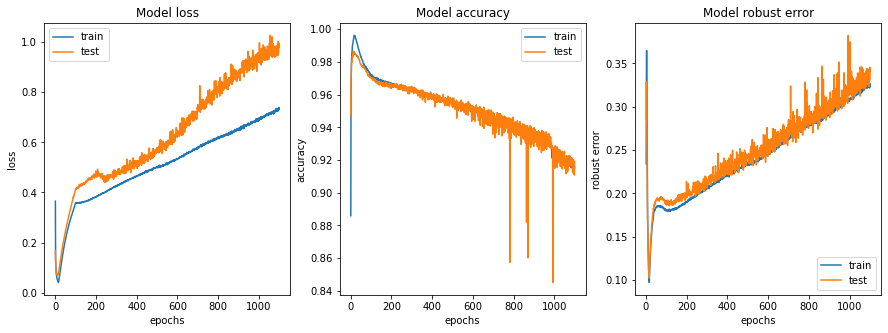

In [6]:
model_name = "mnist_small_0_005_exp5"

trainer = Trainer(model_name, train_dl, test_dl, eps_scheduler, kappa_scheduler, checkpoint=10)
model = Small()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-4,
                                                 patience=2, verbose=True)

history = trainer.train(model, loss_fn, optimizer, scheduler, epochs=1100)
plot_history(model_name, history)

In [7]:
print(f"max eps: {eps_scheduler.current}")

max eps: 0.30799999999859023


In [8]:
test_transform = transforms.Compose([
    transforms.ToTensor(),
])

ds = MNIST('../data', train=False, target_transform=None, download=True, transform=test_transform)
test_loader = DataLoader(ds, 400, shuffle=True)


def create_attack(eps, alpha, num_iter):
    d = {
        "epsilon": eps,
        "alpha": alpha,
        "num_iter": num_iter
    }
    return f"e={eps:.1f},a={alpha:.1f},i={num_iter}", d
    

attack1 = create_attack(eps=0.1, alpha=0.1, num_iter=30)
attack2 = create_attack(eps=0.2, alpha=0.1, num_iter=30)
attack3 = create_attack(eps=0.3, alpha=0.1, num_iter=30)
attack4 = create_attack(eps=0.4, alpha=0.1, num_iter=30)

params = [attack1, attack2, attack3, attack4]

In [9]:
model_name = "mnist_small_0_005_exp5"

In [10]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_10.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9826                            
name: e=0.1,a=0.1,i=30 accuracy: 0.6321           
name: e=0.2,a=0.1,i=30 accuracy: 0.0134           
name: e=0.3,a=0.1,i=30 accuracy: 0.0000           
name: e=0.4,a=0.1,i=30 accuracy: 0.0000           


In [24]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_60.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9768                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7608           
name: e=0.2,a=0.1,i=30 accuracy: 0.0314           
name: e=0.3,a=0.1,i=30 accuracy: 0.0009           
name: e=0.4,a=0.1,i=30 accuracy: 0.0009           


In [11]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_100.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9704                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7440           
name: e=0.2,a=0.1,i=30 accuracy: 0.0620           
name: e=0.3,a=0.1,i=30 accuracy: 0.0201           
name: e=0.4,a=0.1,i=30 accuracy: 0.0099           


In [12]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_200.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9663                            
name: e=0.1,a=0.1,i=30 accuracy: 0.7077           
name: e=0.2,a=0.1,i=30 accuracy: 0.0550           
name: e=0.3,a=0.1,i=30 accuracy: 0.0203           
name: e=0.4,a=0.1,i=30 accuracy: 0.0198           


In [13]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_300.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.965                             
name: e=0.1,a=0.1,i=30 accuracy: 0.6924           
name: e=0.2,a=0.1,i=30 accuracy: 0.0924           
name: e=0.3,a=0.1,i=30 accuracy: 0.0501           
name: e=0.4,a=0.1,i=30 accuracy: 0.0501           


In [14]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_400.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.957                             
name: e=0.1,a=0.1,i=30 accuracy: 0.6620           
name: e=0.2,a=0.1,i=30 accuracy: 0.1033           
name: e=0.3,a=0.1,i=30 accuracy: 0.0745           
name: e=0.4,a=0.1,i=30 accuracy: 0.0735           


In [15]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_500.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9579                            
name: e=0.1,a=0.1,i=30 accuracy: 0.6452           
name: e=0.2,a=0.1,i=30 accuracy: 0.1080           
name: e=0.3,a=0.1,i=30 accuracy: 0.0920           
name: e=0.4,a=0.1,i=30 accuracy: 0.0911           


In [16]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_600.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9509                            
name: e=0.1,a=0.1,i=30 accuracy: 0.5953           
name: e=0.2,a=0.1,i=30 accuracy: 0.1379           
name: e=0.3,a=0.1,i=30 accuracy: 0.1235           
name: e=0.4,a=0.1,i=30 accuracy: 0.1218           


In [17]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_700.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9491                            
name: e=0.1,a=0.1,i=30 accuracy: 0.5867           
name: e=0.2,a=0.1,i=30 accuracy: 0.1312           
name: e=0.3,a=0.1,i=30 accuracy: 0.1213           
name: e=0.4,a=0.1,i=30 accuracy: 0.1191           


In [18]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_800.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9434                            
name: e=0.1,a=0.1,i=30 accuracy: 0.5587           
name: e=0.2,a=0.1,i=30 accuracy: 0.1382           
name: e=0.3,a=0.1,i=30 accuracy: 0.1310           
name: e=0.4,a=0.1,i=30 accuracy: 0.1292           


In [19]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_900.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9369                            
name: e=0.1,a=0.1,i=30 accuracy: 0.5251           
name: e=0.2,a=0.1,i=30 accuracy: 0.1510           
name: e=0.3,a=0.1,i=30 accuracy: 0.1468           
name: e=0.4,a=0.1,i=30 accuracy: 0.1474           


In [20]:
model = Small().to(device)
model.load_state_dict(torch.load(f"saved/{model_name}/{model_name}_epoch_1000.pt", map_location=device))

acc = clean_acc(model, test_loader)
acc_adv = adv_acc(model, test_loader, nn.CrossEntropyLoss(), pgd, params)

clean accuracy: 0.9274                            
name: e=0.1,a=0.1,i=30 accuracy: 0.5120           
name: e=0.2,a=0.1,i=30 accuracy: 0.1450           
name: e=0.3,a=0.1,i=30 accuracy: 0.1424           
name: e=0.4,a=0.1,i=30 accuracy: 0.1424           
